## Problem Statement:
##### Predict the likelihood of heart disease based on factors like **BMI**, **smoking**, **physical health**, and **age** 🧑‍⚕️❤️. This model aims to help with early diagnosis and personalized prevention plans for better health outcomes 💪📊.


In [1]:
#importing libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('heart.csv')
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
data.shape

(319795, 18)

In [4]:
data_new=data.iloc[:100000]

In [5]:
data_new.shape

(100000, 18)

In [6]:
data.describe().loc[['mean','50%'],:]

,BMI,PhysicalHealth,MentalHealth,SleepTime
mean,28.325399,3.37171,3.898366,7.097075
50%,27.340000,0.00000,0.000000,7.000000


In [7]:
data_new.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [8]:
data_new.isnull().sum()/len(data_new)*100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

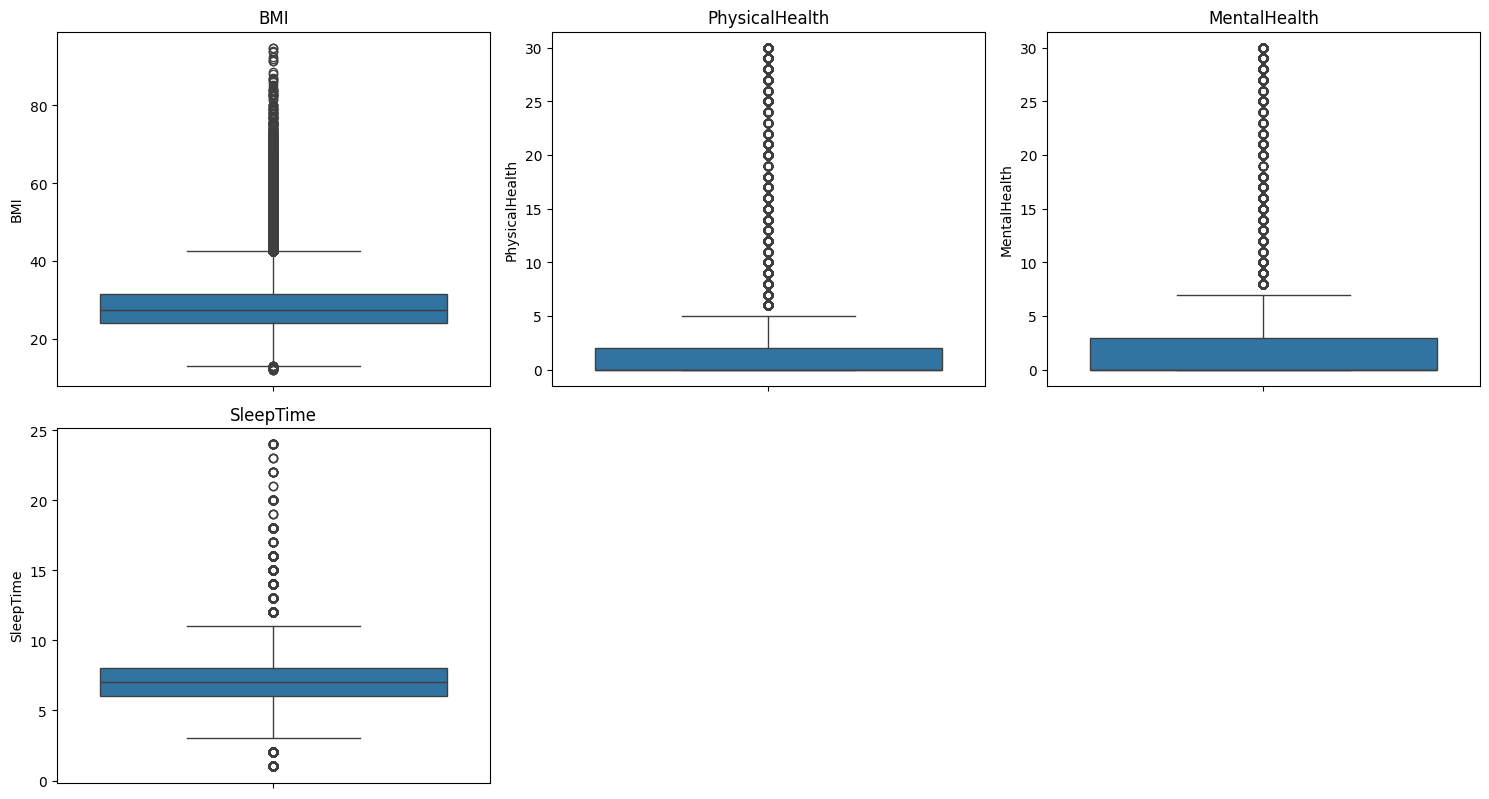

In [9]:
num_col=data.select_dtypes('number')
plt.figure(figsize=(15,12))
for i,j in enumerate(num_col.columns,1):
    plt.subplot(3,3,i)
    sns.boxplot(data[j])
    plt.title(j)

plt.tight_layout()
plt.show()

In [10]:
#we have extreme outliers we have to detect them 
from scipy.stats import mstats
out_lier=['BMI','PhysicalHealth','MentalHealth','SleepTime']
for col in out_lier:
    data_new[col]=mstats.winsorize(data_new[col],limits=[0.05,0.06])

In [11]:
out_lier=['PhysicalHealth','MentalHealth']
for col in out_lier:
    data_new[col]=mstats.winsorize(data_new[col],limits=[0.11,0.16])

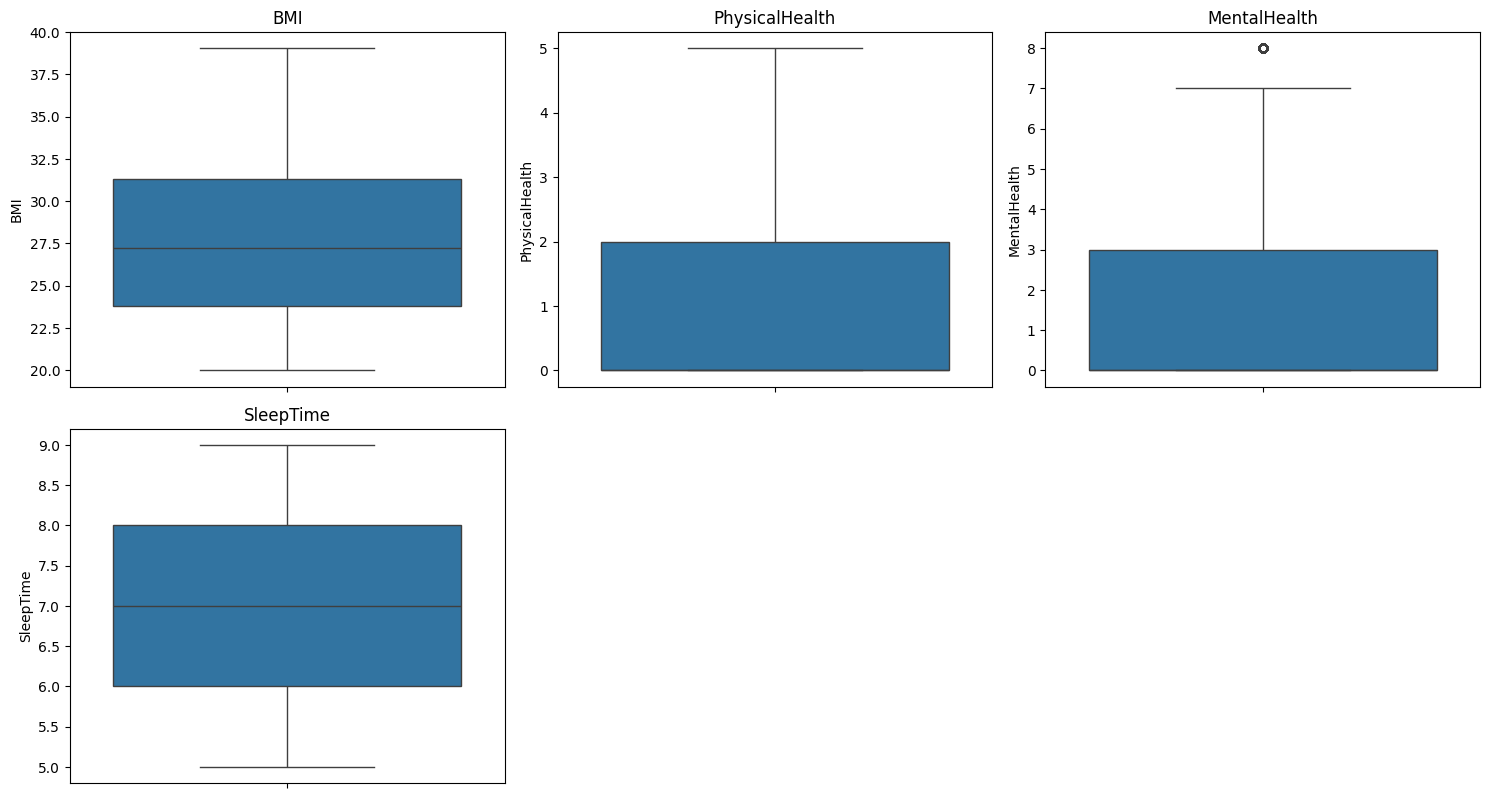

In [12]:
num_col=data.select_dtypes('number')
plt.figure(figsize=(15,12))
for i,j in enumerate(num_col.columns,1):
    plt.subplot(3,3,i)
    sns.boxplot(data_new[j])
    plt.title(j)

plt.tight_layout()
plt.show()

In [13]:
data_new.duplicated().sum()

3111

In [14]:
data2=data_new.drop_duplicates()
data2.duplicated().sum()

0

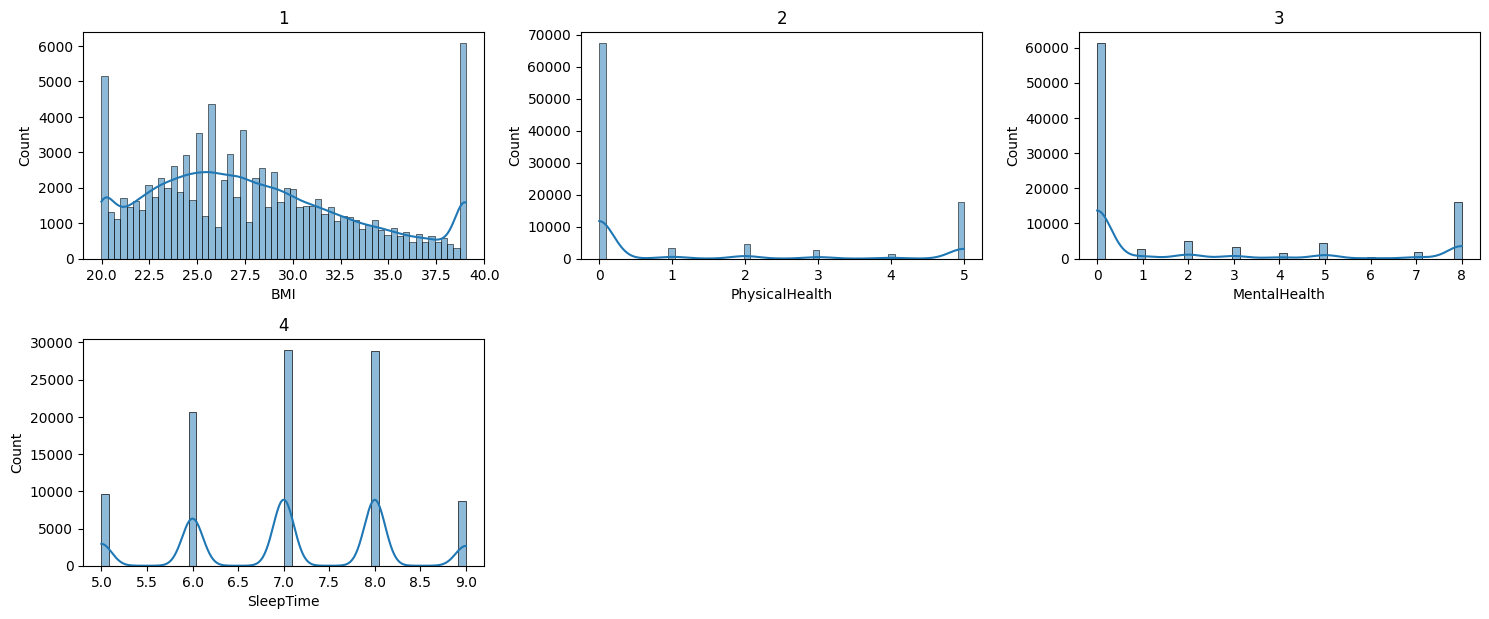

In [15]:
num_col=data.select_dtypes('number')
plt.figure(figsize=(15,12))
for i,j in enumerate(num_col.columns,1):
    plt.subplot(4,3,i)
    sns.histplot(data2[j],kde=True)
    plt.title(i)

plt.tight_layout()
plt.show()

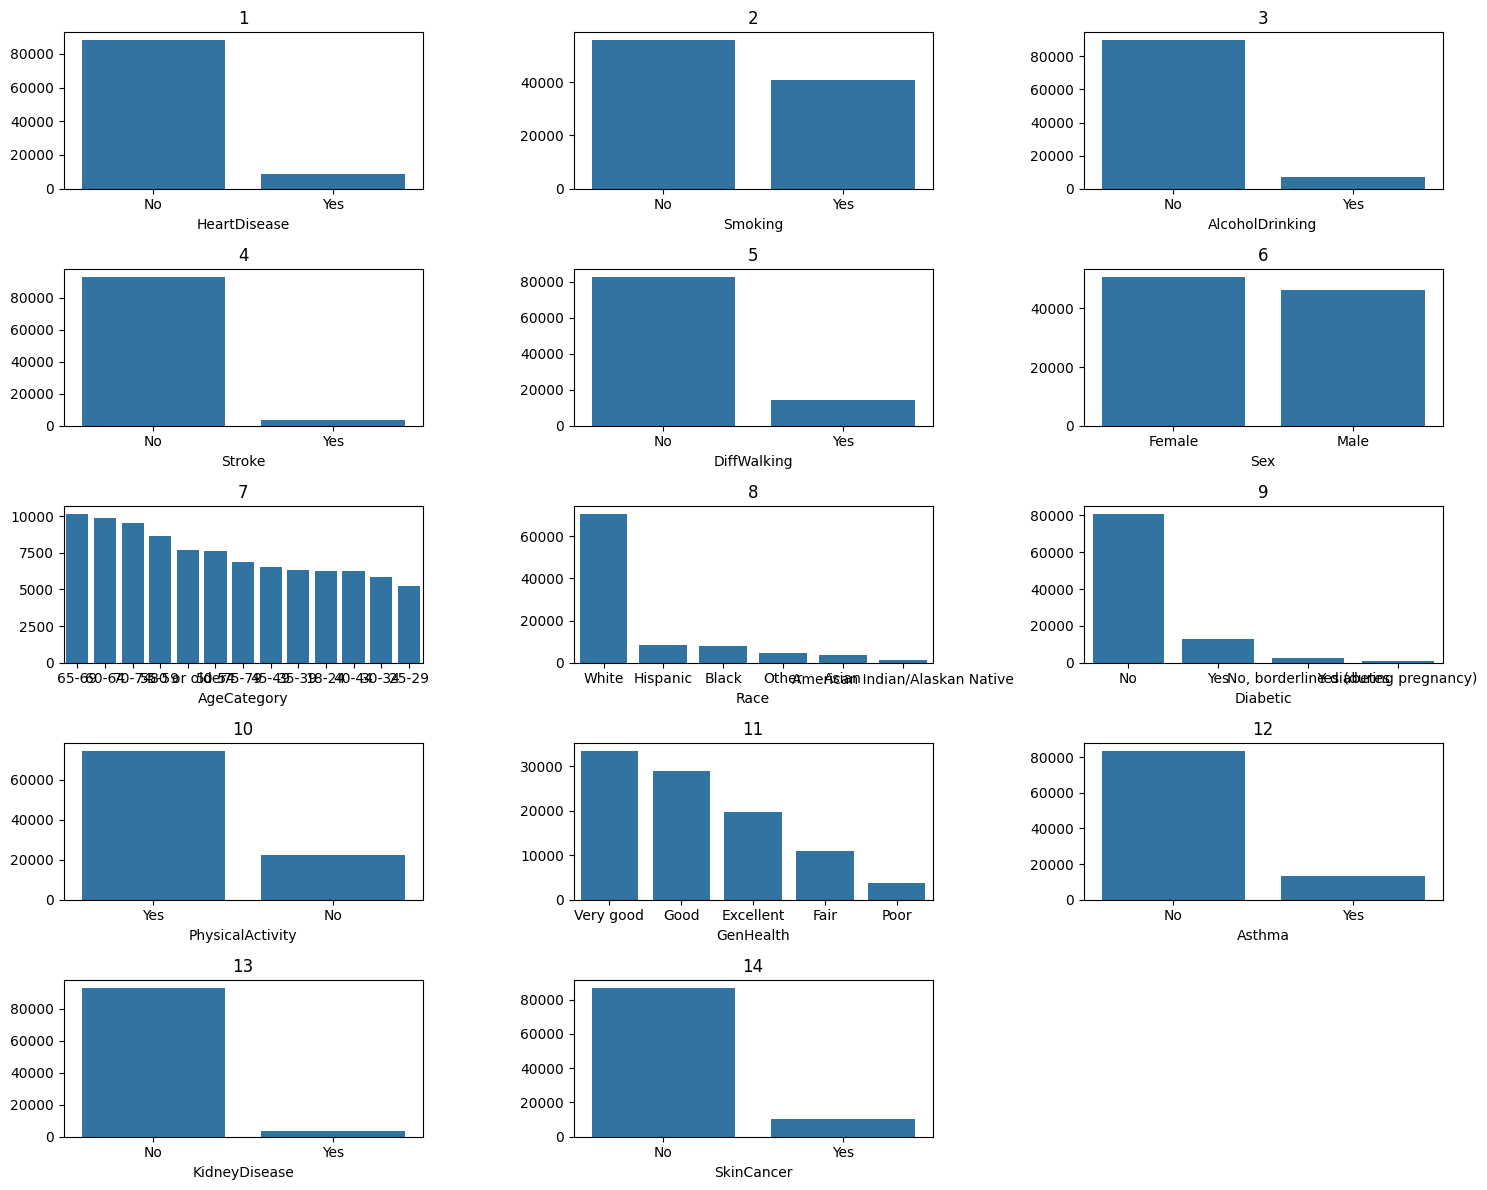

In [16]:
cat_col=data.select_dtypes('object')
plt.figure(figsize=(15,12))
for i,j in enumerate(cat_col.columns,1):
    plt.subplot(5,3,i)
    sns.barplot(x=data2[j].value_counts().index,y=data2[j].value_counts().values)
    plt.title(i)

plt.tight_layout()
plt.show()

In [17]:
for col in data2:
    print(data2[col].value_counts())

#HeartDisease -le
#smoking-le
# AlcoholDrinking-le
#Stroke -le
#DiffWalking -le
#Sex -le
#Race -ohe
#SkinCancer-target column -le
#KidneyDisease -le
#Asthma -le
#GenHealth ohe
#PhysicalActivity -le
#Diabetic ohe


HeartDisease
No     88320
Yes     8569
Name: count, dtype: int64
BMI
39.05    5735
19.99    4296
26.63    1073
27.44     795
27.46     781
         ... 
30.84       1
20.58       1
21.05       1
20.29       1
38.94       1
Name: count, Length: 1502, dtype: int64
Smoking
No     55956
Yes    40933
Name: count, dtype: int64
AlcoholDrinking
No     90043
Yes     6846
Name: count, dtype: int64
Stroke
No     93050
Yes     3839
Name: count, dtype: int64
PhysicalHealth
0.0    67353
5.0    17555
2.0     4569
1.0     3214
3.0     2744
4.0     1454
Name: count, dtype: int64
MentalHealth
0.0    61291
8.0    15987
2.0     5081
5.0     4492
3.0     3351
1.0     2793
7.0     1790
4.0     1651
6.0      453
Name: count, dtype: int64
DiffWalking
No     82728
Yes    14161
Name: count, dtype: int64
Sex
Female    50759
Male      46130
Name: count, dtype: int64
AgeCategory
65-69          10155
60-64           9853
70-74           9511
55-59           8636
80 or older     7688
50-54           7610
75-79      

In [18]:
ohe_col=['Diabetic','GenHealth','Race']
data3=pd.get_dummies(data2,columns=ohe_col,drop_first=True)

In [19]:
data3.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic_Yes (during pregnancy),GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,No,19.99,Yes,No,No,3.0,8.0,No,Female,55-59,...,False,False,False,False,True,False,False,False,False,True
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,False,False,False,False,True,False,False,False,False,True
2,No,26.58,Yes,No,No,5.0,8.0,No,Male,65-69,...,False,True,False,False,False,False,False,False,False,True
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,...,False,False,True,False,False,False,False,False,False,True
4,No,23.71,No,No,No,5.0,0.0,Yes,Female,40-44,...,False,False,False,False,True,False,False,False,False,True


In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lab_en=['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','SkinCancer','KidneyDisease','Asthma','PhysicalActivity','AgeCategory']
for col in lab_en:
    data3[col]=le.fit_transform(data3[col])

In [21]:
data3['HeartDisease'].value_counts()

HeartDisease
0    88320
1     8569
Name: count, dtype: int64

In [22]:
data3.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic_Yes (during pregnancy),GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,19.99,1,0,0,3.0,8.0,0,0,7,...,False,False,False,False,True,False,False,False,False,True
1,0,20.34,0,0,1,0.0,0.0,0,0,12,...,False,False,False,False,True,False,False,False,False,True
2,0,26.58,1,0,0,5.0,8.0,0,1,9,...,False,True,False,False,False,False,False,False,False,True
3,0,24.21,0,0,0,0.0,0.0,0,0,11,...,False,False,True,False,False,False,False,False,False,True
4,0,23.71,0,0,0,5.0,0.0,1,0,4,...,False,False,False,False,True,False,False,False,False,True


In [95]:
# data['AgeCategory'].value_counts()

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data4=scaler.fit_transform(data3)
data5=pd.DataFrame(data4,columns=data3.columns)
data5.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic_Yes (during pregnancy),GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,-0.311484,-1.511562,1.169194,-0.275736,-0.203119,0.927427,1.936167,-0.413734,-0.953312,0.129272,...,-0.091187,-0.356807,-0.653179,-0.200599,1.377052,-0.198474,-0.300878,-0.310746,-0.221288,0.610329
1,-0.311484,-1.445711,-0.855290,-0.275736,4.923219,-0.599965,-0.651791,-0.413734,-0.953312,1.520228,...,-0.091187,-0.356807,-0.653179,-0.200599,1.377052,-0.198474,-0.300878,-0.310746,-0.221288,0.610329
2,-0.311484,-0.271688,1.169194,-0.275736,-0.203119,1.945688,1.936167,-0.413734,1.048974,0.685654,...,-0.091187,2.802638,-0.653179,-0.200599,-0.726189,-0.198474,-0.300878,-0.310746,-0.221288,0.610329
3,-0.311484,-0.717591,-0.855290,-0.275736,-0.203119,-0.599965,-0.651791,-0.413734,-0.953312,1.242037,...,-0.091187,-0.356807,1.530974,-0.200599,-0.726189,-0.198474,-0.300878,-0.310746,-0.221288,0.610329
4,-0.311484,-0.811664,-0.855290,-0.275736,-0.203119,1.945688,-0.651791,2.417015,-0.953312,-0.705302,...,-0.091187,-0.356807,-0.653179,-0.200599,1.377052,-0.198474,-0.300878,-0.310746,-0.221288,0.610329


In [24]:
data5['SkinCancer'].value_counts()
data5['SkinCancer']=le.fit_transform(data5['SkinCancer'])

In [25]:
data5['SkinCancer'].value_counts()

SkinCancer
0    86845
1    10044
Name: count, dtype: int64

In [26]:
for col in data5:
    print(data5[col].value_counts())

HeartDisease
-0.311484    88320
 3.210439     8569
Name: count, dtype: int64
BMI
 2.074477    5735
-1.511562    4296
-0.262281    1073
-0.109884     795
-0.106121     781
             ... 
 0.529808       1
-1.400557       1
-1.312129       1
-1.455119       1
 2.053781       1
Name: count, Length: 1502, dtype: int64
Smoking
-0.855290    55956
 1.169194    40933
Name: count, dtype: int64
AlcoholDrinking
-0.275736    90043
 3.626657     6846
Name: count, dtype: int64
Stroke
-0.203119    93050
 4.923219     3839
Name: count, dtype: int64
PhysicalHealth
-0.599965    67353
 1.945688    17555
 0.418296     4569
-0.090834     3214
 0.927427     2744
 1.436558     1454
Name: count, dtype: int64
MentalHealth
-0.651791    61291
 1.936167    15987
-0.004801     5081
 0.965683     4492
 0.318694     3351
-0.328296     2793
 1.612673     1790
 0.642188     1651
 1.289178      453
Name: count, dtype: int64
DiffWalking
-0.413734    82728
 2.417015    14161
Name: count, dtype: int64
Sex
-0.953312    

In [27]:
data6 = data5.astype({col: 'int' for col in data5.select_dtypes(include=['float']).columns})

In [28]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [29]:
X=data6.drop(columns='SkinCancer',axis=1)
y=data6.SkinCancer
# X.head()
# y.head()

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)
log.fit(x_train,y_train)

LogisticRegression()

In [31]:
pred=log.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score,classification_report
accuracy=accuracy_score(y_test,pred)
accuracy

0.893745484570131

In [33]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17329
           1       0.31      0.00      0.01      2049

    accuracy                           0.89     19378
   macro avg       0.60      0.50      0.48     19378
weighted avg       0.83      0.89      0.84     19378

